# Credit Card Fraud Detection


Credit card fraud is a widespread phenomenon that is growing every year. It leads to unwanted transactions on customers' accounts, which negatively affects the trust in financial institutions. Therefore, the ability to detect suspicious transactions in a timely manner is critical for banks and payment systems.

The goal of this project is to develop a machine learning algorithm that can identify fraudulent transactions with high accuracy and sensitivity. For this purpose, we used an open dataset from the Kaggle platform containing transactions from September 2013. The data description is available here: [Credit Card Fraud Detection Dataset] (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

Before starting the analysis, we will create a working environment, download the necessary libraries, and prepare the data.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
#import data
path_data_test = "./creditcard.csv"

df = pd.read_csv(path_data_test)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Understanding of data types

In [3]:
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

#### Main statistic data

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Count of normal and fraud operations

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### Check missing values

In [6]:
missing = df.isnull().sum().sum()
missing

np.int64(0)

After the initial analysis, we see that the set contains more than 280 thousand transactions, and no field contains missing values, which greatly simplifies the preparation of data for modeling.

However, a significant drawback is the strong imbalance of classes: only one transaction out of 570 is fraudulent. In other words, for every one suspicious transaction, there are 569 normal ones. This situation can lead to the predominance of the “normal” class in the model's predictions.

This feature requires a special approach to data processing and the choice of evaluation metrics - in particular, the priority use of **recall**, **precision**, **f1-score** and **ROC AUC**, instead of the usual **accuracy**.

### Data visualization

#### Visualization normal and fraid transactions

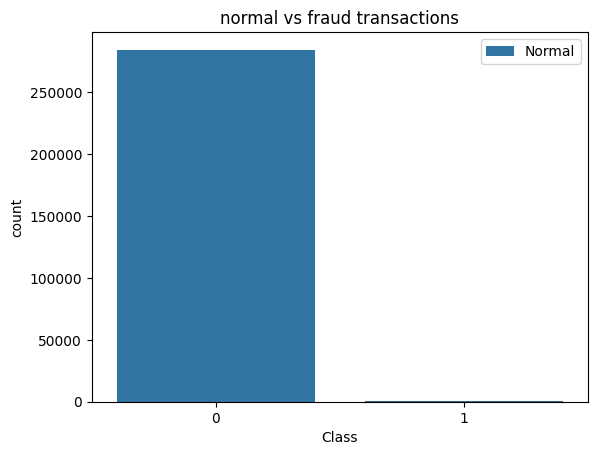

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [7]:
sns.countplot(x='Class', data=df)
plt.title('normal vs fraud transactions')
plt.legend(['Normal', 'Fraud'])
plt.show()

fraud_ratio = df['Class'].value_counts(normalize=True)
print(fraud_ratio)

#### Heatmap to understand data correlation

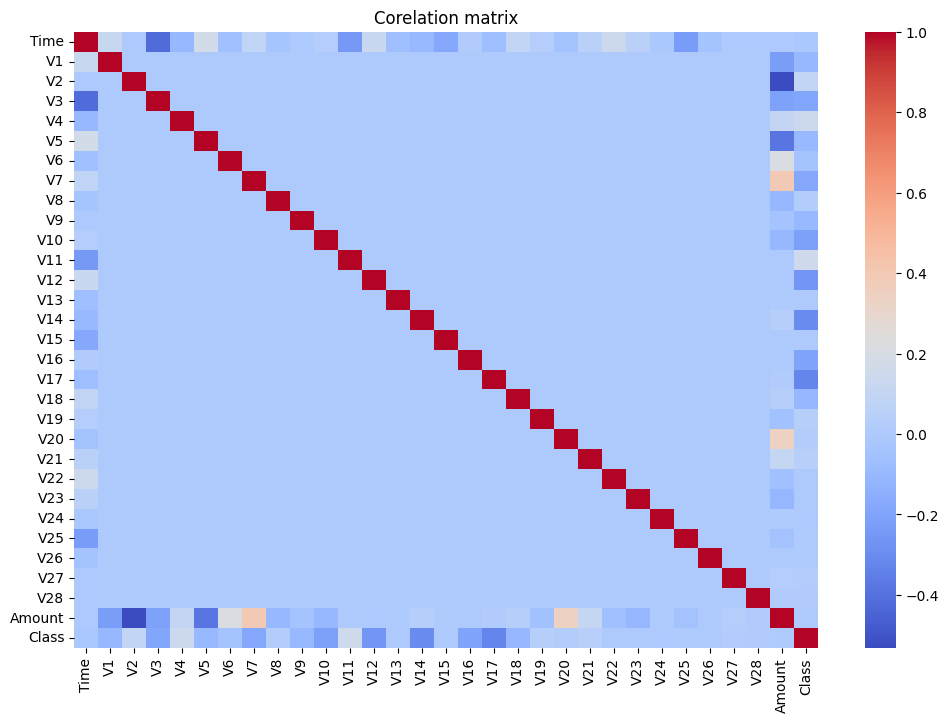

In [9]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Corelation matrix")
plt.show()

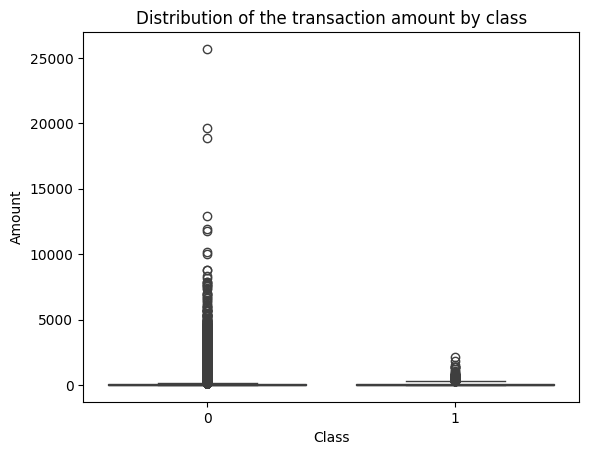

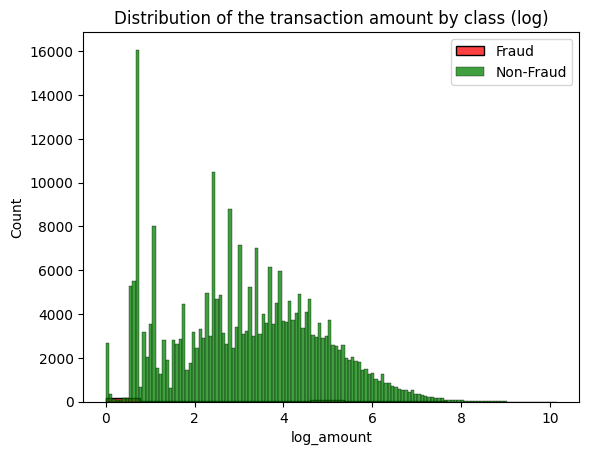

In [10]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of the transaction amount by class')
plt.show()

# Logarithmization for better visualization
df['log_amount'] = np.log1p(df['Amount'])

sns.histplot(df[df['Class'] == 1]['log_amount'], color='red', label='Fraud')
sns.histplot(df[df['Class'] == 0]['log_amount'], color='green', label='Non-Fraud')
plt.legend()
plt.title("Distribution of the transaction amount by class (log)")
plt.show()

#### Data scaling

In [11]:
scaler = StandardScaler()
scaled_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Class']).columns

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

In [12]:
df.shape

(284807, 32)

#### Removing the target variable from the dataset

In [13]:
X = df.drop('Class', axis=1)
y = df.Class


#### Split data into test and training data

In [14]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3,stratify=y, random_state=0)

#### Import functions for build and evaluate a model

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

#### Find the best coeficient for KNN 

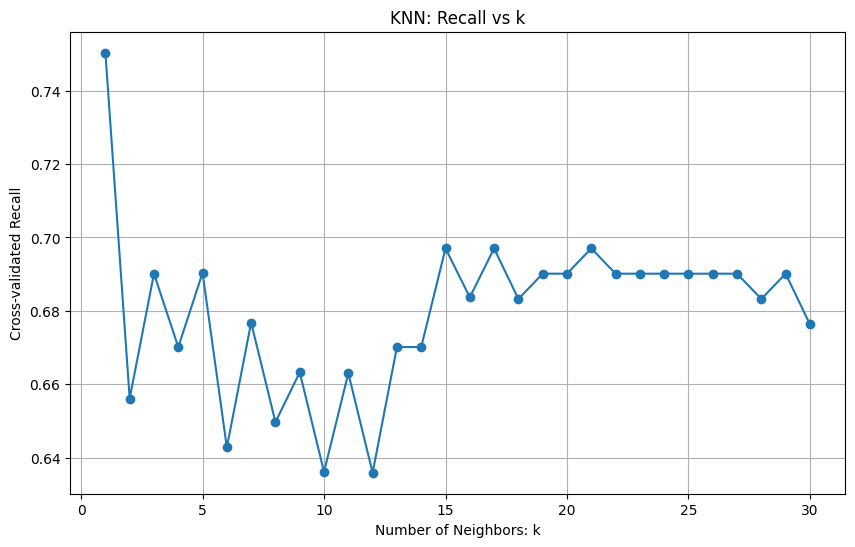

The best value for k according Recall: 1 (Recall = 0.7503)


In [16]:
k_range = range(1, 31)
recall_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # evaluate by Recall
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
    
    # Mean value for Recall
    recall_scores.append(scores.mean())

# Visualization a result
plt.figure(figsize=(10, 6))
plt.plot(k_range, recall_scores, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Cross-validated Recall')
plt.title('KNN: Recall vs k')
plt.grid(True)
plt.show()

# The best value for k
best_k = k_range[np.argmax(recall_scores)]
print(f"The best value for k according Recall: {best_k} (Recall = {max(recall_scores):.4f})")

#### Build a model and prediction

In [18]:
# build a model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# make prediction
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

#### Evaluate model

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[198978     42]
 [    87    257]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997    199020
           1     0.8595    0.7471    0.7994       344

    accuracy                         0.9994    199364
   macro avg     0.9295    0.8734    0.8995    199364
weighted avg     0.9993    0.9994    0.9993    199364


ROC AUC Score: 0.9254855843049546


#### Use another model to predict fraud transaction

function to evaluate models

In [30]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
    print("=" * 50)

### Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
print("=== Random Forest ===")
evaluate_model(rf, X_train, y_train, X_test, y_test)

=== Random Forest ===
Confusion Matrix:
[[199006     14]
 [    93    251]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.95      0.73      0.82       344

    accuracy                           1.00    199364
   macro avg       0.97      0.86      0.91    199364
weighted avg       1.00      1.00      1.00    199364

ROC AUC Score: 0.95047148907554


### XGBoost

In [31]:
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity = 0)
print("=== XGBoost ===")
evaluate_model(xgb, X_train, y_train, X_test, y_test)

=== XGBoost ===
Confusion Matrix:
[[199020      0]
 [   344      0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.00      0.00      0.00       344

    accuracy                           1.00    199364
   macro avg       0.50      0.50      0.50    199364
weighted avg       1.00      1.00      1.00    199364

ROC AUC Score: 0.5


### Logistic Regression

In [23]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
print("=== Logistic Regression ===")
evaluate_model(lr, X_train, y_train, X_test, y_test)

=== Logistic Regression ===
Confusion Matrix:
[[193189   5831]
 [    33    311]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    199020
           1       0.05      0.90      0.10       344

    accuracy                           0.97    199364
   macro avg       0.53      0.94      0.54    199364
weighted avg       1.00      0.97      0.98    199364

ROC AUC Score: 0.9612102499924047


## Conclusion



The study made it possible to build a model that detects up to 90% of fraudulent transactions, while correctly classifying transactions with a high probability (ROC AUC = 96%).
Recommendations:

- The Logistic Regression model is recommended for implementation as the first line of transaction verification.

- All transactions that the model identifies as fraudulent should be checked manually or automatically blocked with further user confirmation.

- It is recommended to improve accuracy:

    - Add new features (e.g., geolocation, user transaction history).

    - Conduct regular model retraining every 1-2 months.
